<a href="https://colab.research.google.com/github/GinoS70/github-slideshow/blob/master/excel_pandas_test_gino_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
filename = '/content/gdrive/My Drive/Colab Notebooks/eurusd500.xlsx' 

In [0]:
df_eurusd = pd.read_excel(filename)

In [0]:
df_eurusd.head()

,Date,Time,O,H,L,C,USD,EUR,GBP,JPY,CHF,CAD,AUD,NZD,USDD1,EURD1,GBPD1,JPYD1,CHFD1,CADD1,AUDD1,NZDD1,Percup
0,2018.12.21,10:00:00,1.14683,1.14733,1.14421,1.14436,-1.02009,0.97750,-0.55071,2.38085,2.39043,-1.82679,-1.39688,-0.95433,-0.21504,0.13243,-0.46355,-0.16117,0.11288,0.00856,0.15419,0.43170,0.00612
1,2018.12.21,11:00:00,1.14436,1.14443,1.14115,1.14272,-0.64186,0.80887,0.25525,2.78798,2.02611,-1.71757,-1.81585,-1.70293,-0.37823,0.16864,-0.80596,-0.40712,0.36432,-0.10922,0.41897,0.74861,0.00963
2,2018.12.21,12:00:00,1.14272,1.14283,1.14127,1.14195,-0.23862,0.41107,1.11196,3.27700,1.47469,-1.65113,-2.09220,-2.29277,-0.40324,0.39780,-0.85671,-0.48902,0.55142,-0.06644,0.27635,0.58984,0.06830
3,2018.12.21,13:00:00,1.14195,1.14273,1.14145,1.14234,0.27149,-0.02415,1.59114,3.76098,1.07748,-1.73071,-2.22020,-2.72603,-0.51011,0.43522,-0.47918,-0.48398,0.39721,0.07958,0.12800,0.43325,0.01926
4,2018.12.21,14:00:00,1.14234,1.14256,1.13994,1.14140,0.97268,-0.81820,1.81833,4.05573,0.43159,-1.61024,-2.18789,-2.66200,-0.70119,0.79405,-0.22719,-0.29475,0.64589,-0.12047,-0.03231,-0.06403,0.08674


In [0]:
df_eurusd['Returns'] = np.log(df_eurusd['C'] / df_eurusd['C'].shift(1))  

In [0]:
df_eurusd.head()

,Date,Time,O,H,L,C,USD,EUR,GBP,JPY,CHF,CAD,AUD,NZD,USDD1,EURD1,GBPD1,JPYD1,CHFD1,CADD1,AUDD1,NZDD1,Percup,Returns
0,2018.12.21,10:00:00,1.14683,1.14733,1.14421,1.14436,-1.02009,0.97750,-0.55071,2.38085,2.39043,-1.82679,-1.39688,-0.95433,-0.21504,0.13243,-0.46355,-0.16117,0.11288,0.00856,0.15419,0.43170,0.00612,NaN
1,2018.12.21,11:00:00,1.14436,1.14443,1.14115,1.14272,-0.64186,0.80887,0.25525,2.78798,2.02611,-1.71757,-1.81585,-1.70293,-0.37823,0.16864,-0.80596,-0.40712,0.36432,-0.10922,0.41897,0.74861,0.00963,-0.001434
2,2018.12.21,12:00:00,1.14272,1.14283,1.14127,1.14195,-0.23862,0.41107,1.11196,3.27700,1.47469,-1.65113,-2.09220,-2.29277,-0.40324,0.39780,-0.85671,-0.48902,0.55142,-0.06644,0.27635,0.58984,0.06830,-0.000674
3,2018.12.21,13:00:00,1.14195,1.14273,1.14145,1.14234,0.27149,-0.02415,1.59114,3.76098,1.07748,-1.73071,-2.22020,-2.72603,-0.51011,0.43522,-0.47918,-0.48398,0.39721,0.07958,0.12800,0.43325,0.01926,0.000341
4,2018.12.21,14:00:00,1.14234,1.14256,1.13994,1.14140,0.97268,-0.81820,1.81833,4.05573,0.43159,-1.61024,-2.18789,-2.66200,-0.70119,0.79405,-0.22719,-0.29475,0.64589,-0.12047,-0.03231,-0.06403,0.08674,-0.000823


In [0]:
df_eurusd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 24 columns):
Date       499 non-null object
Time       499 non-null object
O          499 non-null float64
H          499 non-null float64
L          499 non-null float64
C          499 non-null float64
USD        499 non-null float64
EUR        499 non-null float64
GBP        499 non-null float64
JPY        499 non-null float64
CHF        499 non-null float64
CAD        499 non-null float64
AUD        499 non-null float64
NZD        499 non-null float64
USDD1      499 non-null float64
EURD1      499 non-null float64
GBPD1      499 non-null float64
JPYD1      499 non-null float64
CHFD1      499 non-null float64
CADD1      499 non-null float64
AUDD1      499 non-null float64
NZDD1      499 non-null float64
Percup     499 non-null float64
Returns    498 non-null float64
dtypes: float64(22), object(2)
memory usage: 93.7+ KB


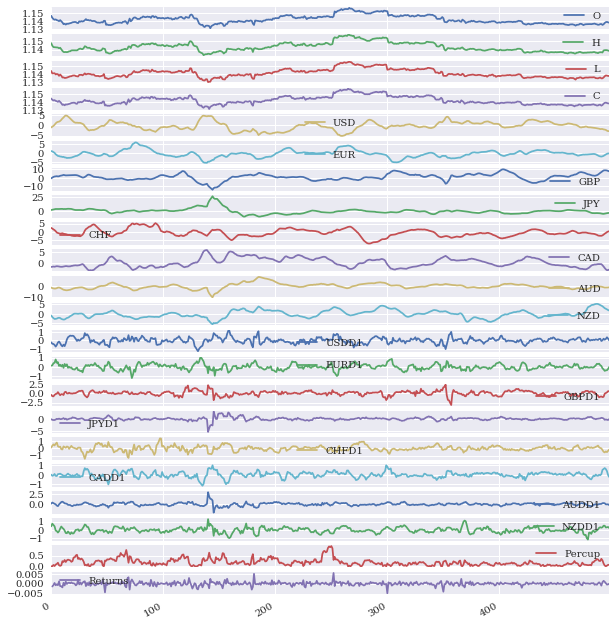

In [0]:
df_eurusd.plot(figsize=(10, 12), subplots=True); 

In [0]:
df_eurusd.describe().round(2) 

,O,H,L,C,USD,EUR,GBP,JPY,CHF,CAD,AUD,NZD,USDD1,EURD1,GBPD1,JPYD1,CHFD1,CADD1,AUDD1,NZDD1,Percup,Returns
count,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,498.00
mean,1.14,1.14,1.14,1.14,-0.23,-0.57,1.03,0.38,-0.56,0.17,-0.09,-0.13,0.00,0.00,-0.02,0.01,0.00,0.00,-0.00,-0.00,0.19,-0.00
std,0.01,0.01,0.01,0.01,2.08,1.96,3.96,4.56,2.28,2.03,2.37,1.99,0.33,0.30,0.61,0.64,0.36,0.29,0.36,0.31,0.16,0.00
min,1.13,1.13,1.13,1.13,-5.14,-5.63,-14.13,-8.92,-7.03,-3.43,-9.93,-5.50,-1.22,-1.19,-3.15,-5.43,-1.46,-1.14,-2.08,-1.13,0.00,-0.00
25%,1.14,1.14,1.14,1.14,-1.51,-1.76,-1.31,-2.19,-2.05,-1.48,-1.47,-1.51,-0.17,-0.18,-0.35,-0.29,-0.20,-0.16,-0.19,-0.18,0.08,-0.00
50%,1.14,1.14,1.14,1.14,-0.24,-0.58,1.27,0.36,-0.79,-0.22,-0.36,-0.22,0.02,-0.00,0.02,0.01,-0.01,-0.00,-0.02,-0.00,0.16,0.00
75%,1.15,1.15,1.14,1.15,1.20,0.30,3.36,1.84,0.96,1.76,1.29,1.24,0.20,0.18,0.35,0.23,0.21,0.16,0.21,0.21,0.26,0.00
max,1.16,1.16,1.16,1.16,4.81,5.84,10.15,25.73,5.27,5.84,7.96,5.15,1.10,0.98,2.26,3.05,1.38,0.97,2.97,1.28,0.94,0.01


In [0]:
print("checking if any null values are present\n", df_eurusd.isna().sum())

checking if any null values are present
 Date       0
Time       0
O          0
H          0
L          0
C          0
USD        0
EUR        0
GBP        0
JPY        0
CHF        0
CAD        0
AUD        0
NZD        0
USDD1      0
EURD1      0
GBPD1      0
JPYD1      0
CHFD1      0
CADD1      0
AUDD1      0
NZDD1      0
Percup     0
Returns    1
dtype: int64


In [0]:
df_eurusd.dropna(inplace=True)

In [0]:
print("checking if any null values are present\n", df_eurusd.isna().sum())

checking if any null values are present
 Date       0
Time       0
O          0
H          0
L          0
C          0
USD        0
EUR        0
GBP        0
JPY        0
CHF        0
CAD        0
AUD        0
NZD        0
USDD1      0
EURD1      0
GBPD1      0
JPYD1      0
CHFD1      0
CADD1      0
AUDD1      0
NZDD1      0
Percup     0
Returns    0
dtype: int64


In [0]:
df_train, df_test = train_test_split(df_eurusd, train_size=0.8, test_size=0.2, shuffle=False)

In [0]:
print("Train and Test size", len(df_train), len(df_test))

Train and Test size 398 100


The data is not normalized and the range for each column varies. Normalizing data helps the algorithm in converging i.e. to find local/ global minimum efficiently. I will use MinMaxScaler from Sci-kit Learn. But before that we have to split the dataset into training and testing datasets. Also I will convert the DataFrame to ndarray in the process.

In [0]:
train_cols = ["O","H","L","C","USD","EUR","GBP","JPY","CHF","CAD","AUD","NZD","USD","EURD1","GBPD1","JPYD1","CHFD1","CADD1","AUDD1","NZDD1"]

# scale the feature MinMax, build array
x = df_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(df_test.loc[:,train_cols])

In [0]:
x_train.shape

(398, 20)

In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import sys 
#from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
py_ver = sys.version 
k_ver = tf.keras.__version__ 
tf_ver = tf.__version__ 
print("Using Python version " + str(py_ver)) 
print("Using Keras version " + str(k_ver)) 
print("Using TensorFlow version " + str(tf_ver))

Using Python version 3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]
Using Keras version 2.2.4-tf
Using TensorFlow version 2.1.0-rc1


In [0]:
from keras.models import Sequential

model = Sequential()

Using TensorFlow backend.


RuntimeError: ignored